## Exploratory Data Analysis

The objectives will be the following:
1. Determine data composition (univariate analysis of the factors in the data)
2. Determine the shares of participants' opinions on each stated issue.
3. Perform correlation matrix to analyze the relationships of each variables.

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, os

In [2]:
plt.style.use('ggplot')
sns.set_context('notebook')

cmap_univ = 'magma'

# Visuals customization
rc_params = {
    'font.family': 'Gotham',
    'figure.dpi': 300,
    'savefig.dpi': 600,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.125,
    'axes.unicode_minus': False,

    # Determine the font style of labels
    'axes.labelsize': 10,
    'axes.labelpad': 6.0,
    
    # The spines should be present and color should be black
    'axes.spines.top': True,
    'axes.spines.right': True,
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.edgecolor': 'black',
    
    # Set the axes, ticks (not the tick labels)
    'axes.axisbelow': True,
    'xtick.bottom': True,
    'xtick.top': False,
    'ytick.left': True,
    'ytick.right': False,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    
    # The ticks should have a distance of 6
    'xtick.major.size': 6,
    'ytick.major.size': 6,
    
    # Set the grid
    # Remove the grid
    'axes.grid': False

}

plt.rcParams.update(rc_params)

In [3]:
save_path = '../figures/01_eda'
os.makedirs(save_path, exist_ok=True)

In [4]:
df = pd.read_csv('../data/01_wrangled.csv')
df1 = pd.read_csv('../data/02_leftright.csv')
df2 = pd.read_csv('../data/03_other.csv')
df_both = pd.concat([df1, df2], ignore_index=True)

In [5]:
df.head()

,Sex,Age,City,Education,Economic Status,Education Reform,Privatization,Death Penalty,Neutral Journalism,Alcohol Prohibition,Secularism,Abortion Ban,Ohal,New Party,Political Affiliation
0,Male,18-30,Marmara,Undergraduate,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes,IYI Parti
1,Male,18-30,Marmara,Undergraduate,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,AKP
2,Female,18-30,Marmara,Undergraduate,No,Yes,No,No,No,No,Yes,No,Yes,Yes,Other
3,Male,0-18,Marmara,High School,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,IYI Parti
4,Male,18-30,Marmara,Associate,No,Yes,Yes,Yes,No,No,Yes,Yes,No,No,IYI Parti


### **Data Composition**

How is the distribution of some factors in the data?

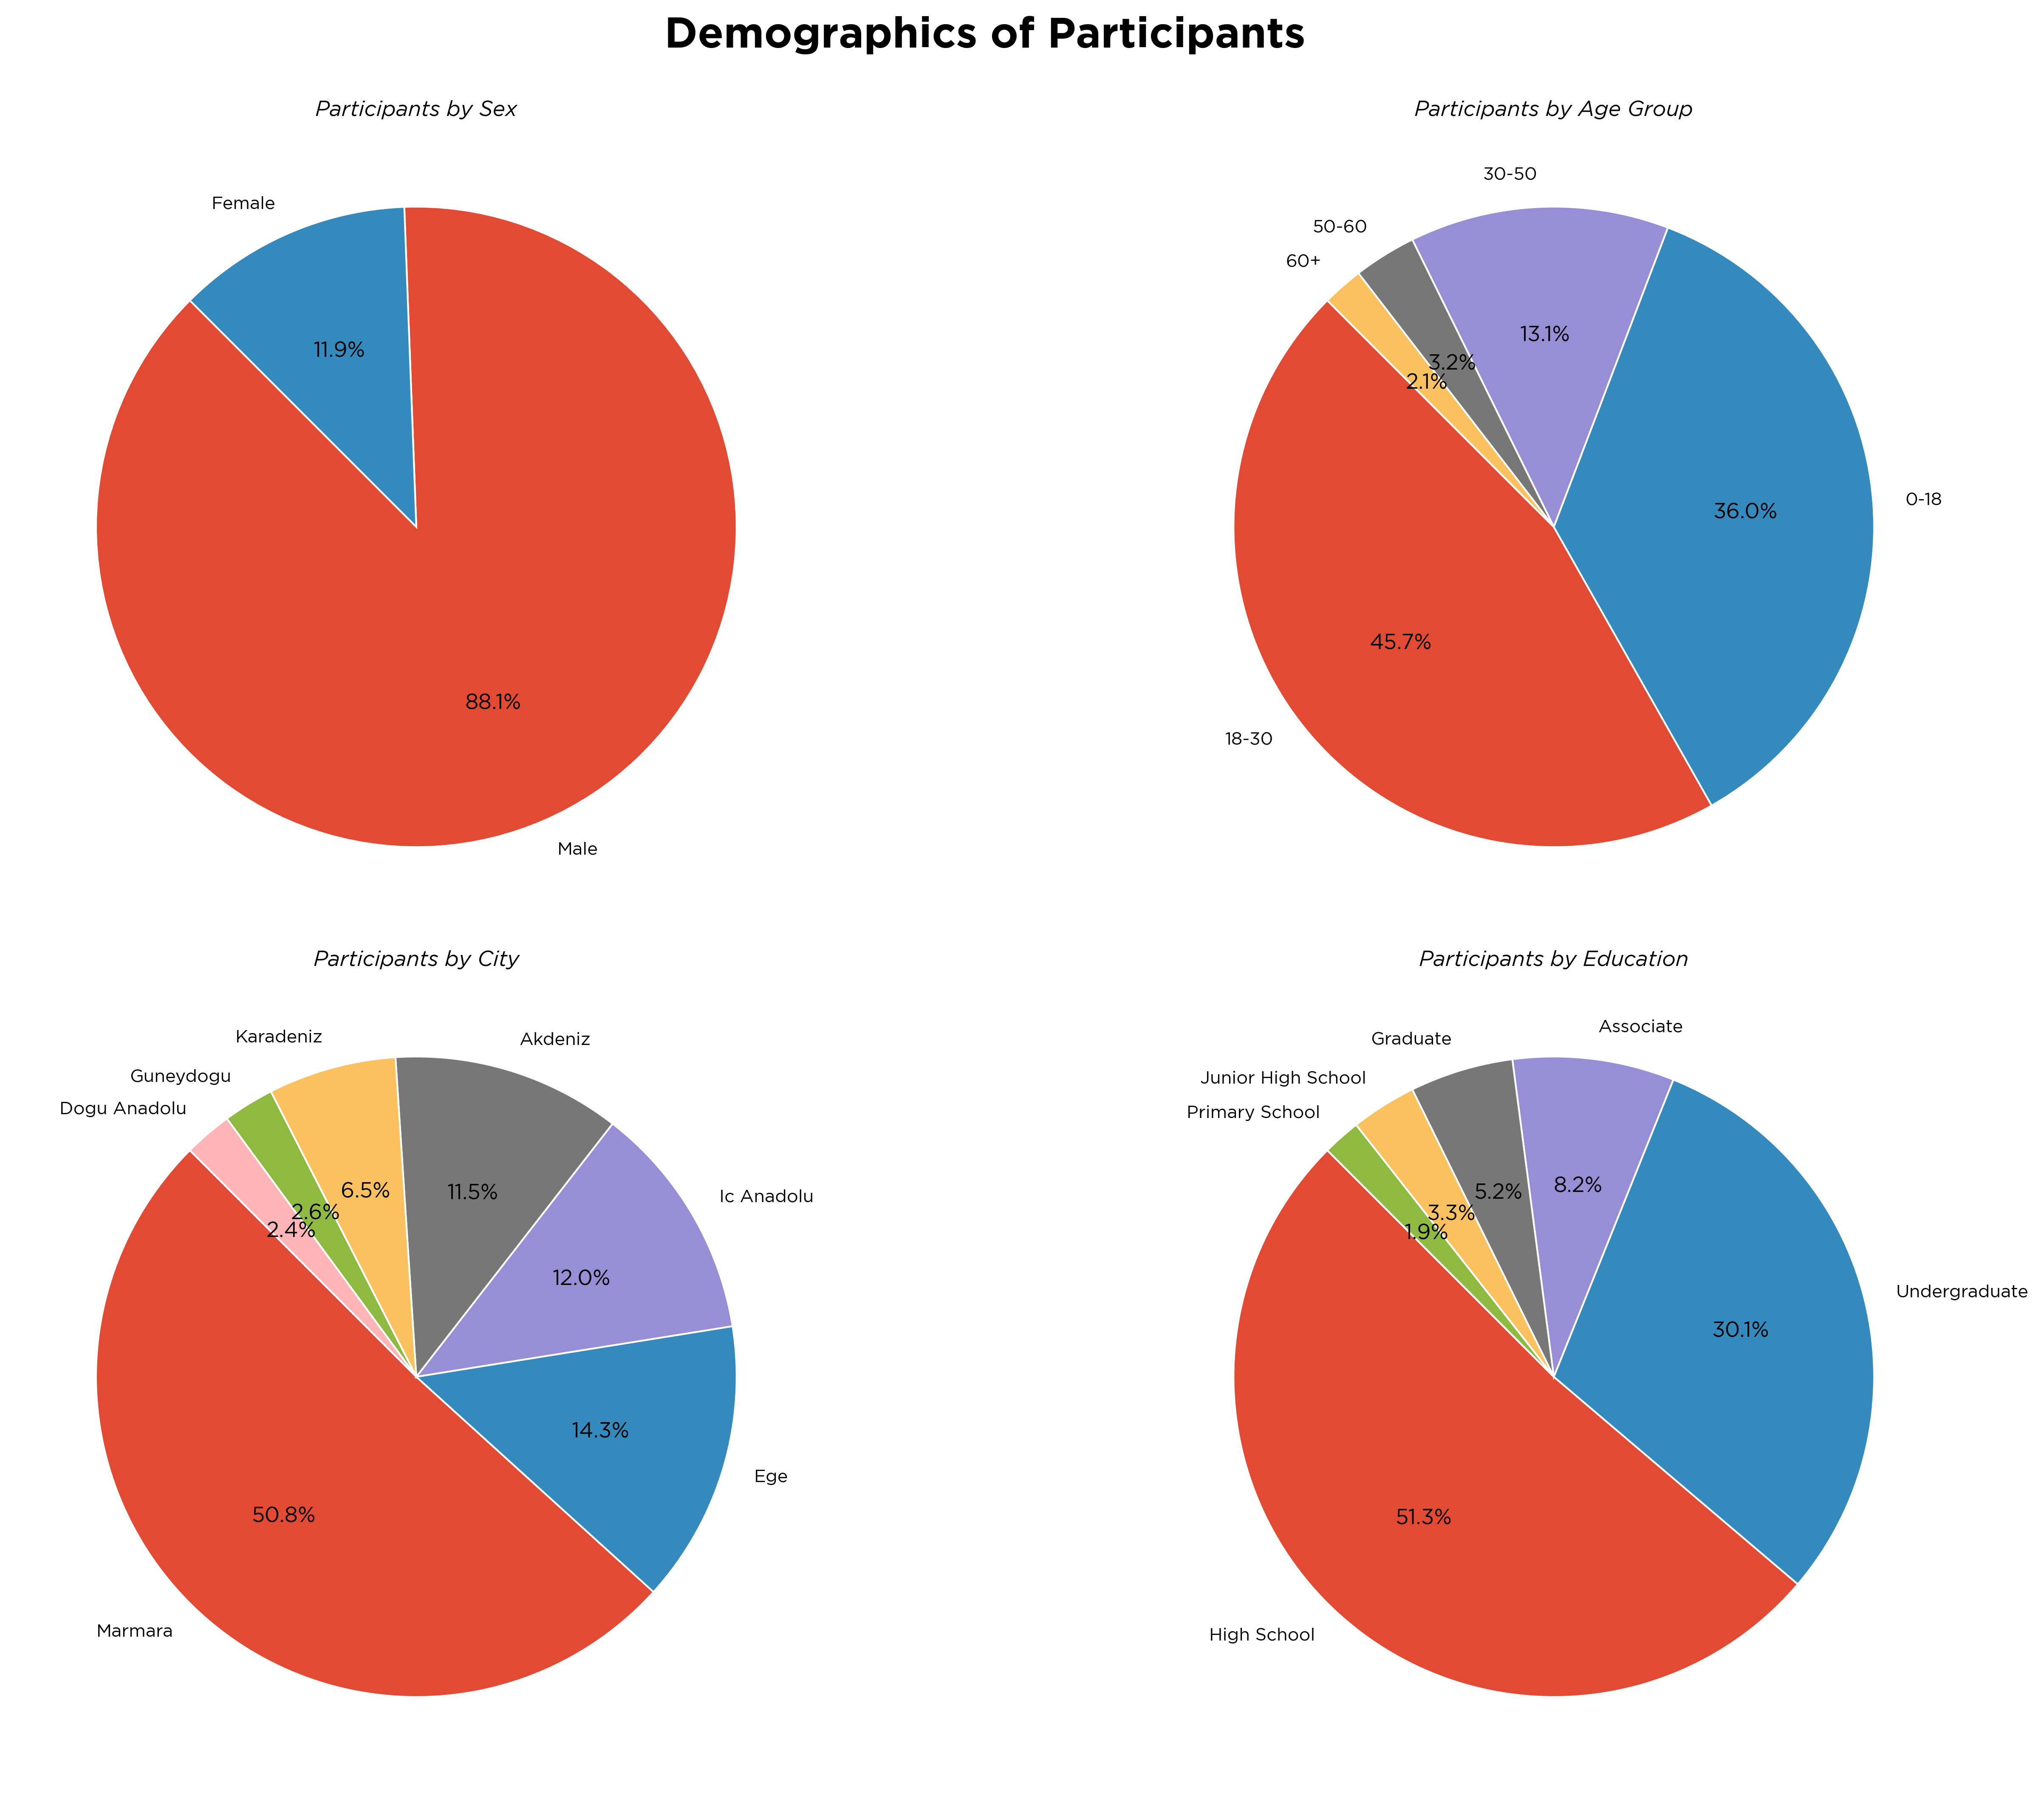

In [6]:
# Visualize (EDA)

# Make plt pie charts for the sex, age group, city, education, and political view columns
fig, ax = plt.subplots(2, 2, figsize=(20, 14))

columns = ['Sex', 'Age', 'City', 'Education']
titles = ['Participants by Sex', 'Participants by Age Group', 'Participants by City', 'Participants by Education']

for i, col in enumerate(columns):
    values = df[col].value_counts()
    labels = values.index
    sizes = values.values

    row, col_index = divmod(i, 2)
    ax[row, col_index].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=135, wedgeprops=dict(linewidth=1, edgecolor='white'))
    ax[row, col_index].set_title(titles[i], fontstyle='italic', fontsize=12)
    
plt.suptitle('Demographics of Participants', fontweight='bold', fontsize=24, y=1)

# Adjust layout
plt.tight_layout()
plt.savefig(os.path.join(save_path, '01-Demographics_Participants.png'))
plt.show()

How do respondents view selected issues?

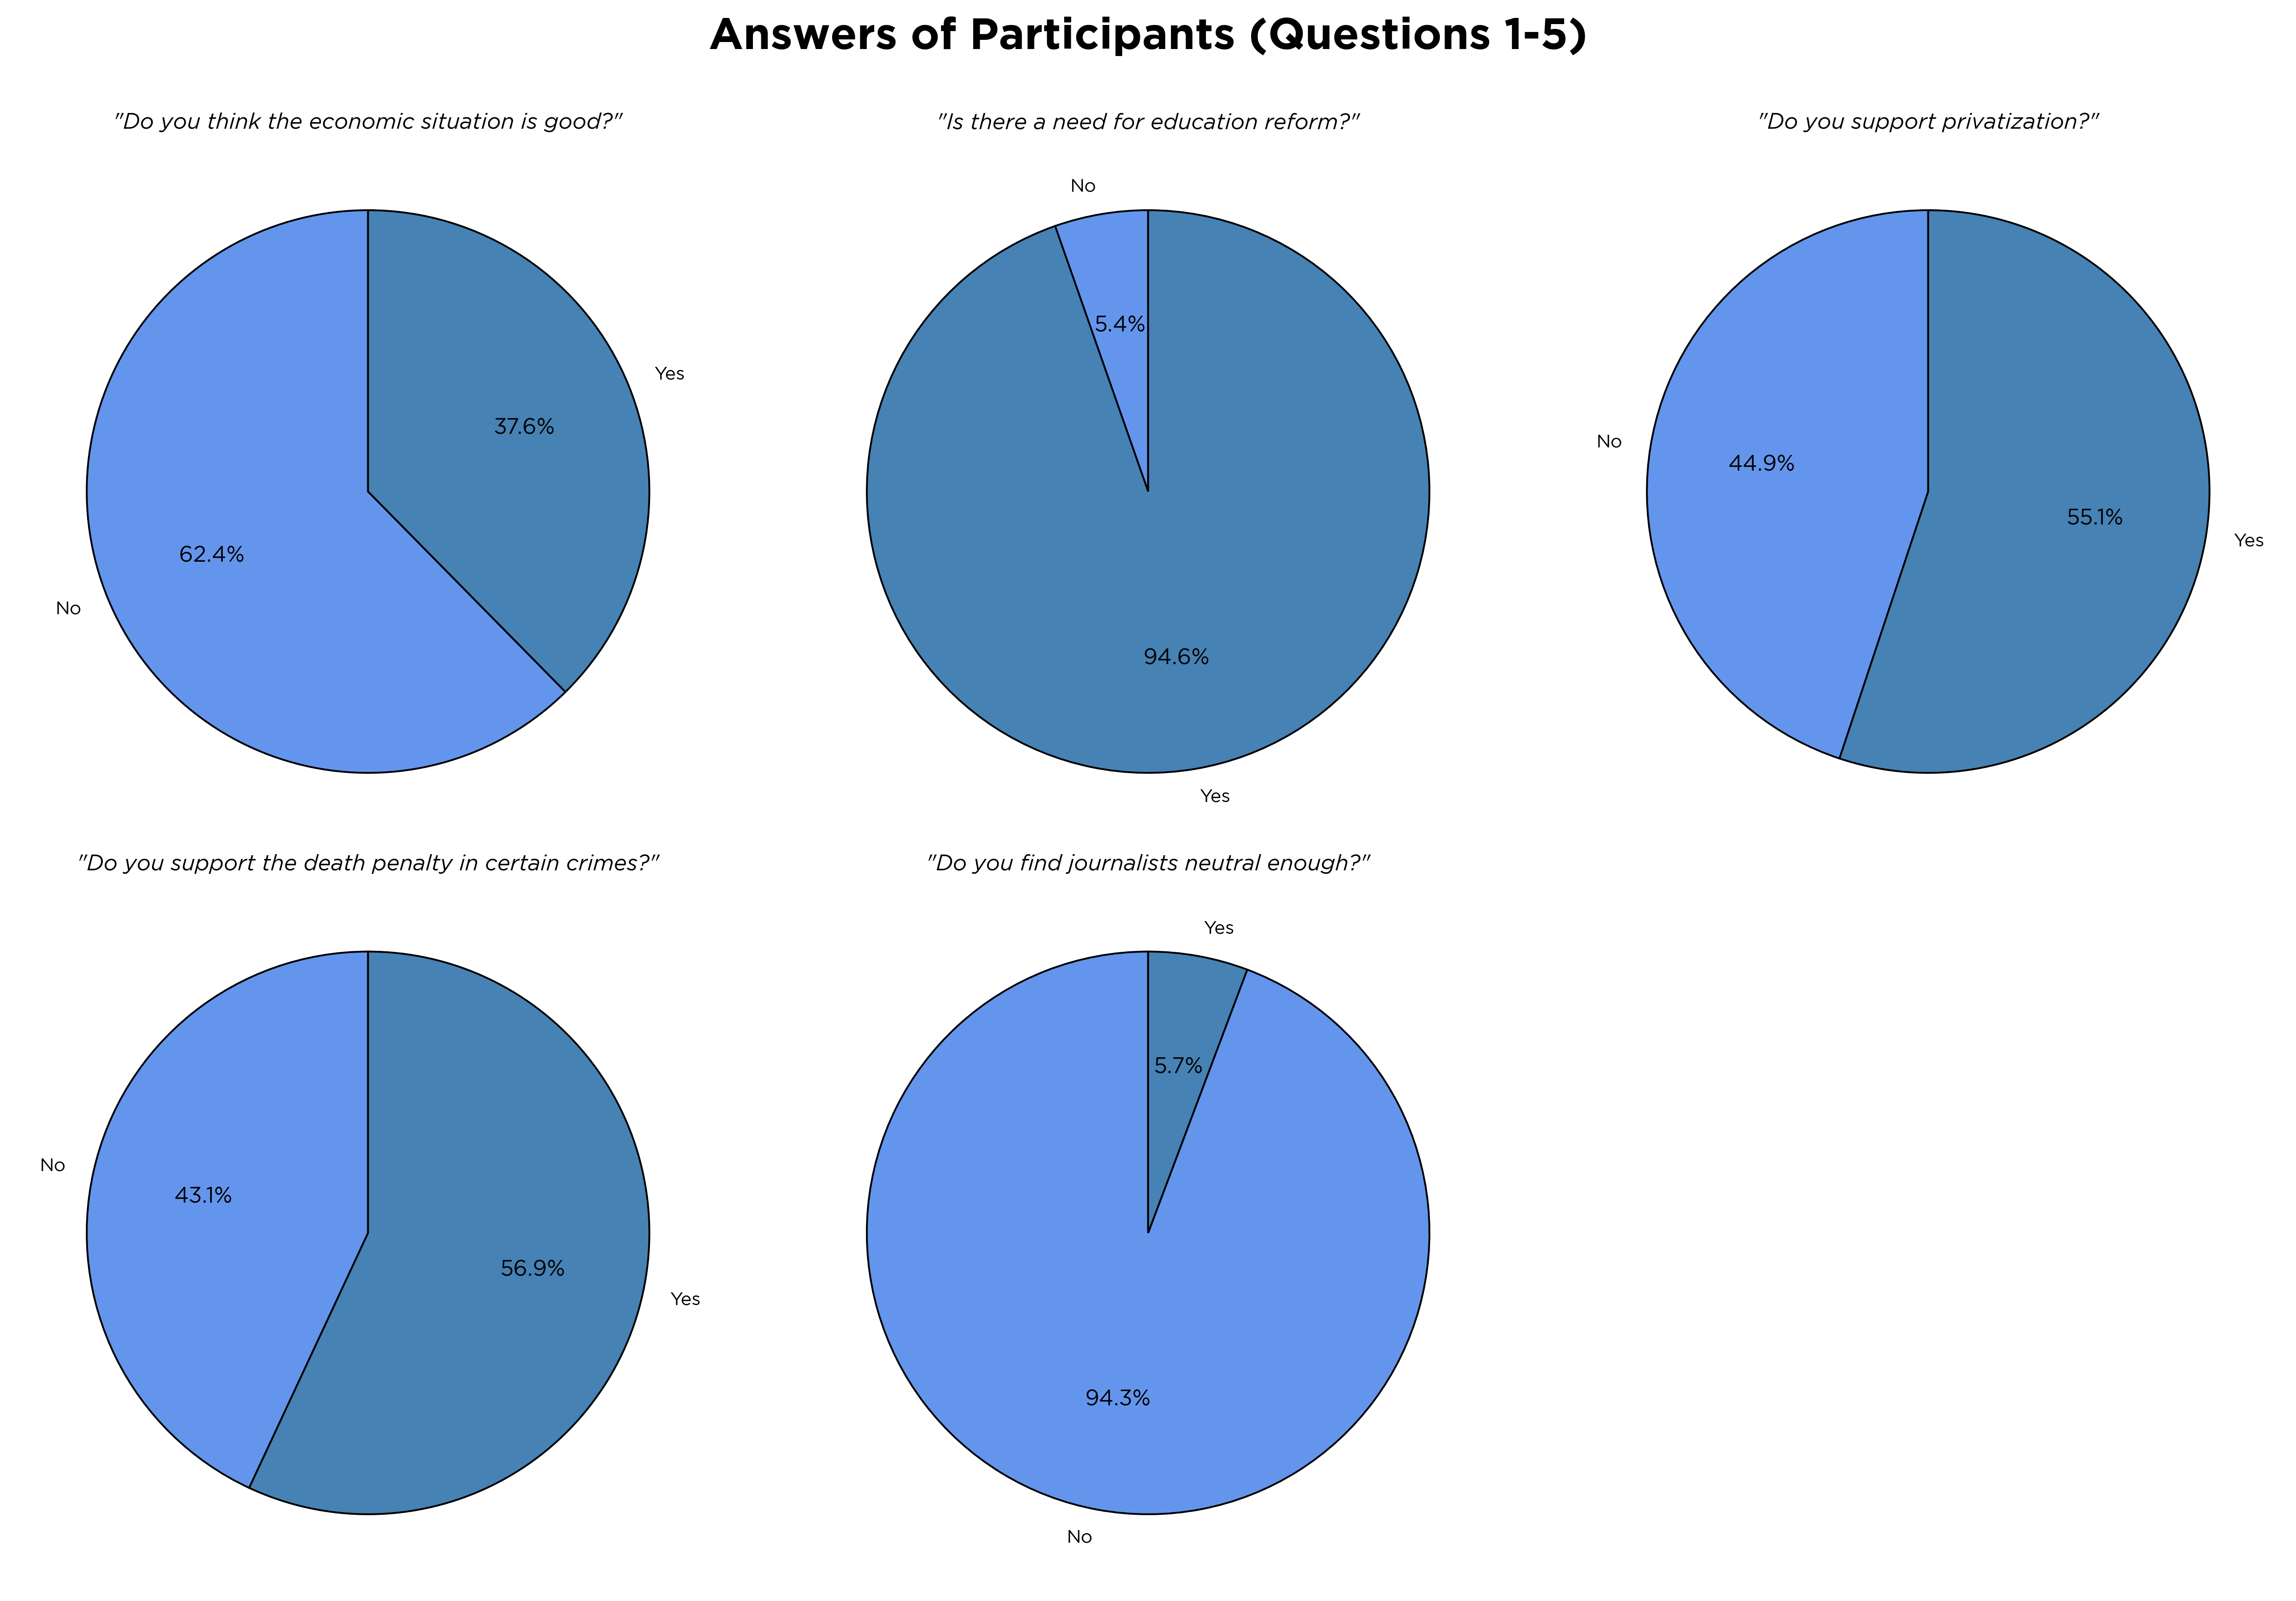

In [7]:
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

columns = ['Economic Status', 'Education Reform', 'Privatization', 'Death Penalty', 'Neutral Journalism']
titles = ['\"Do you think the economic situation is good?\"',
          '\"Is there a need for education reform?\"',
          '\"Do you support privatization?\"',
          '\"Do you support the death penalty in certain crimes?\"',
          '\"Do you find journalists neutral enough?\"']
# Define colors for "yes" (1) and "no" (0), choose response-neutral colors, so red and blue are not used
colors = ['cornflowerblue', 'steelblue']

for i, col in enumerate(columns):
    values = df[col].value_counts().sort_index()  # Ensure 0 and 1 are in the correct order
    labels = ['No', 'Yes']  # Assuming 0: No, 1: Yes
    sizes = values.values

    row, col_index = divmod(i, 3)
    ax[row, col_index].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, 
                           colors=colors, wedgeprops=dict(linewidth=1, edgecolor='black'))
    ax[row, col_index].set_title(titles[i], fontstyle='italic', fontsize=12)
    
plt.suptitle('Answers of Participants (Questions 1-5)', fontweight='bold', fontsize=24, y=1.01)

# Removing the empty subplot (bottom right) if there are only 5 charts
fig.delaxes(ax[1, 2])

# Adjust layout
plt.tight_layout()
plt.savefig(os.path.join(save_path, '02-Answers_Participants_01.png'))
plt.show()

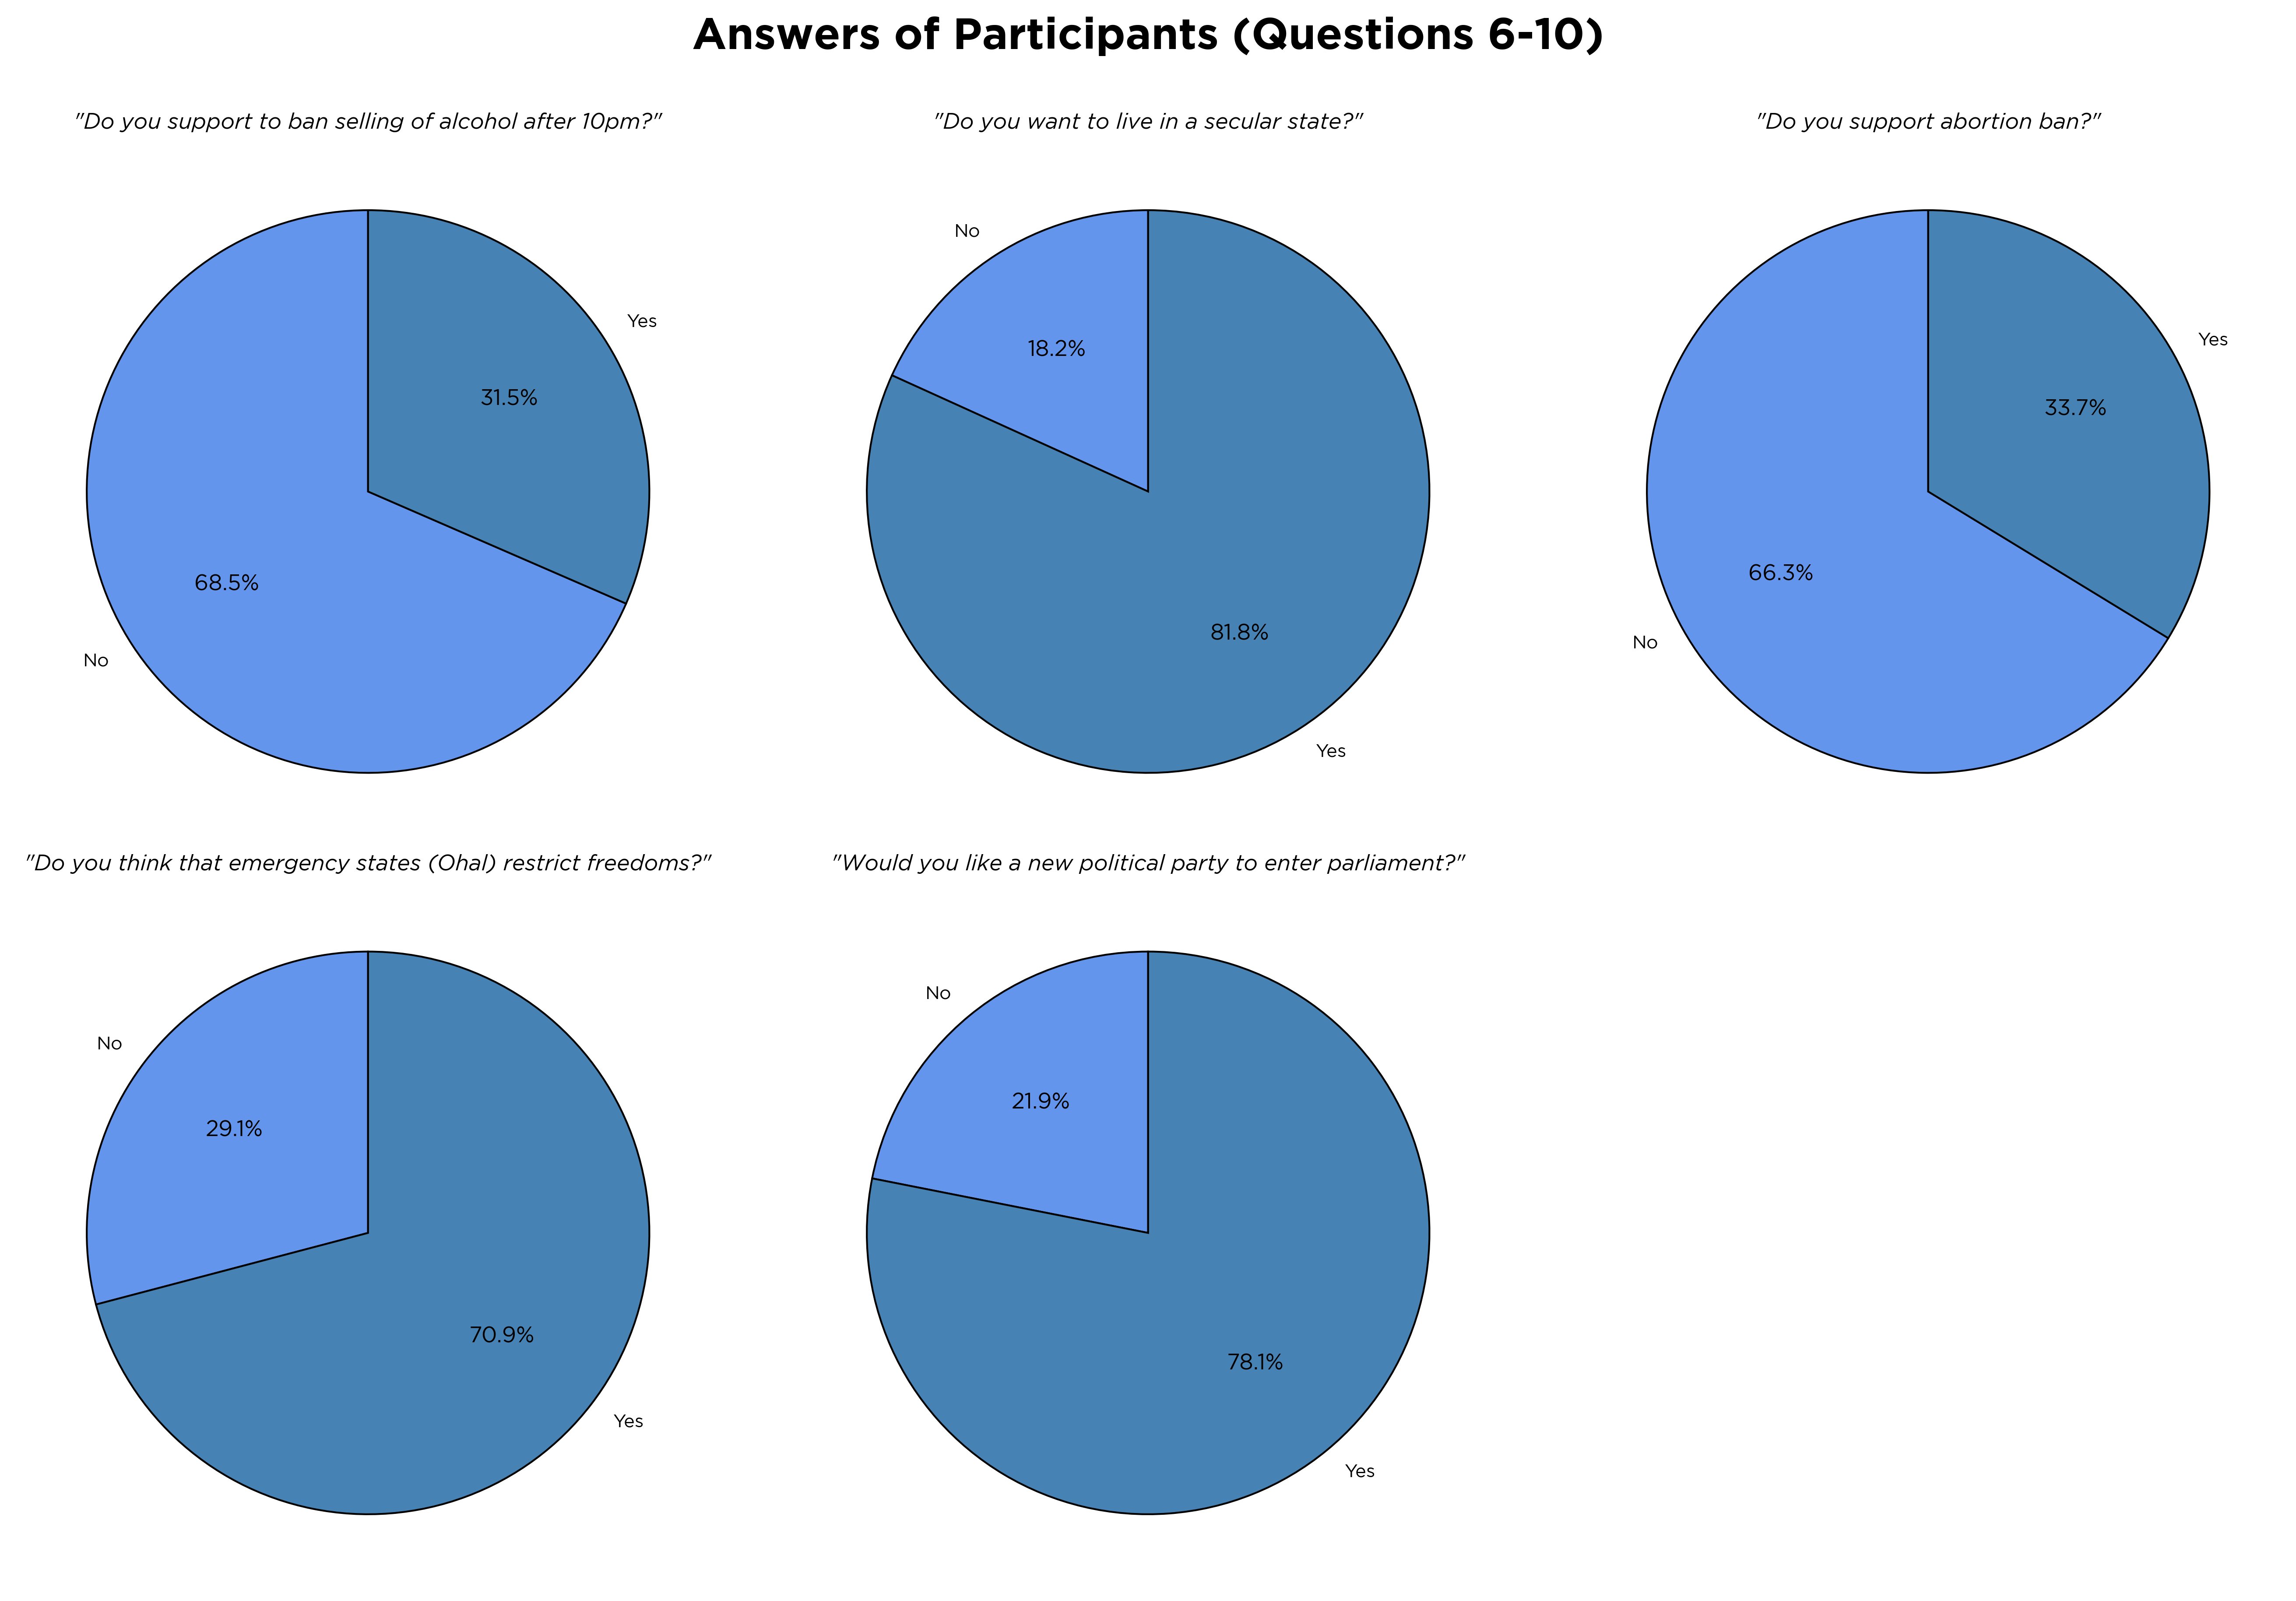

In [8]:
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

columns = ['Alcohol Prohibition', 'Secularism', 'Abortion Ban', 'Ohal', 'New Party']
titles = ['\"Do you support to ban selling of alcohol after 10pm?\"',
          '\"Do you want to live in a secular state?\"',
          '\"Do you support abortion ban?\"',
          '\"Do you think that emergency states (Ohal) restrict freedoms?\"',
          '\"Would you like a new political party to enter parliament?\"']

for i, col in enumerate(columns):
    values = df[col].value_counts().sort_index()  # Ensure 0 and 1 are in the correct order
    labels = ['No', 'Yes']  # Assuming 0: No, 1: Yes
    sizes = values.values

    row, col_index = divmod(i, 3)
    ax[row, col_index].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, 
                           colors=colors, wedgeprops=dict(linewidth=1, edgecolor='black'))
    ax[row, col_index].set_title(titles[i], fontstyle='italic', fontsize=12)
    
plt.suptitle('Answers of Participants (Questions 6-10)', fontweight='bold', fontsize=24, y=1.01)

# Removing the empty subplot (bottom right) if there are only 5 charts
fig.delaxes(ax[1, 2])

# Adjust layout
plt.tight_layout()
plt.savefig(os.path.join(save_path, '02-Answers_Participants_02.png'))
plt.show()

What is the distribution of political views of the participants?

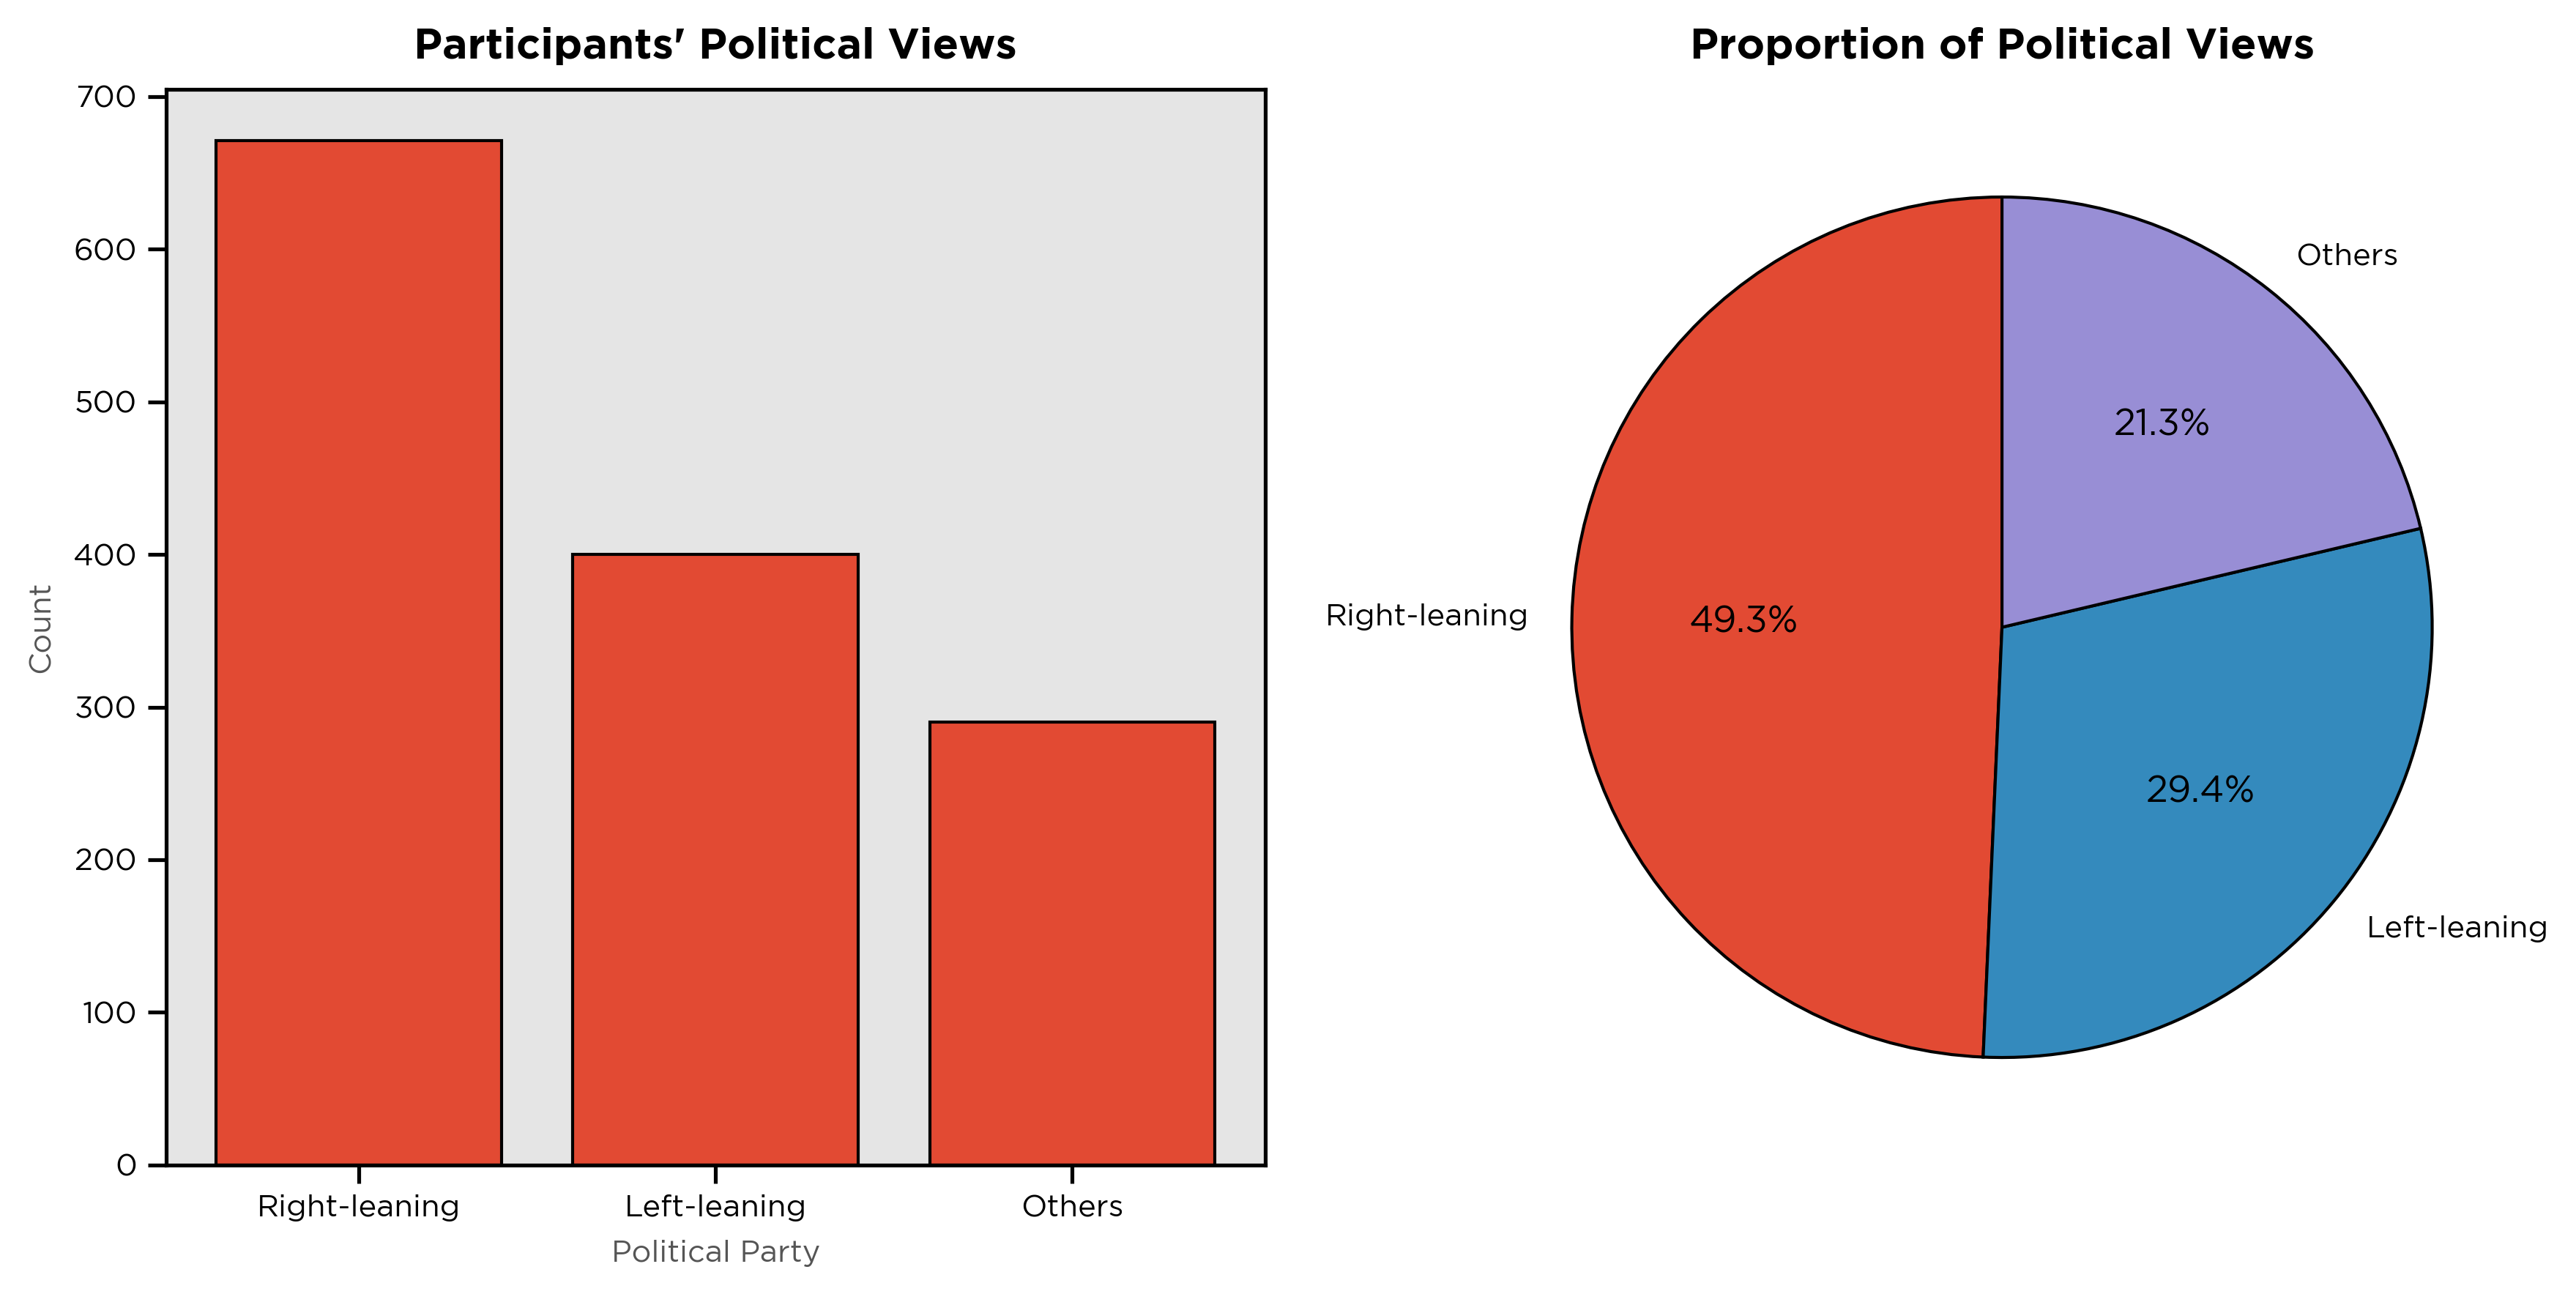

In [9]:
# Pie chart of political party preferences
# Rename the "Political View" values into 'left', 'right', and miscellaneous
df['Political View'] = df['Political Affiliation'].replace({'AKP': 'Right-leaning', # Right-leaning
                    'CHP': 'Left-leaning', # Left-leaning
                    'HDP': 'Left-leaning', # Left-leaning
                    'IYI Parti': 'Right-leaning', # Center-right
                    'MHP': 'Right-leaning',
                    'Other': 'Others'}) # Right-leaning

# Get value counts for Political View
values = df['Political View'].value_counts()

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot
ax1.bar(values.index, values, edgecolor='k', linewidth=1)
ax1.set_title('Participants\' Political Views', fontweight='bold', fontsize=14, pad=10)
ax1.set_xlabel('Political Party')
ax1.set_ylabel('Count')

# Pie chart
ax2.pie(values, labels=values.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(edgecolor='k', linewidth=1))
ax2.set_title('Proportion of Political Views', fontweight='bold', fontsize=14, pad=10)

# Adjust layout
plt.tight_layout()
plt.savefig(os.path.join(save_path, '03-Political_Views_Dist.png'))
plt.show()

Since those with 'Others' as their views account for 21% of the data, it is considerable for it to be the data to use in classifying their true political views after selecting the best model.

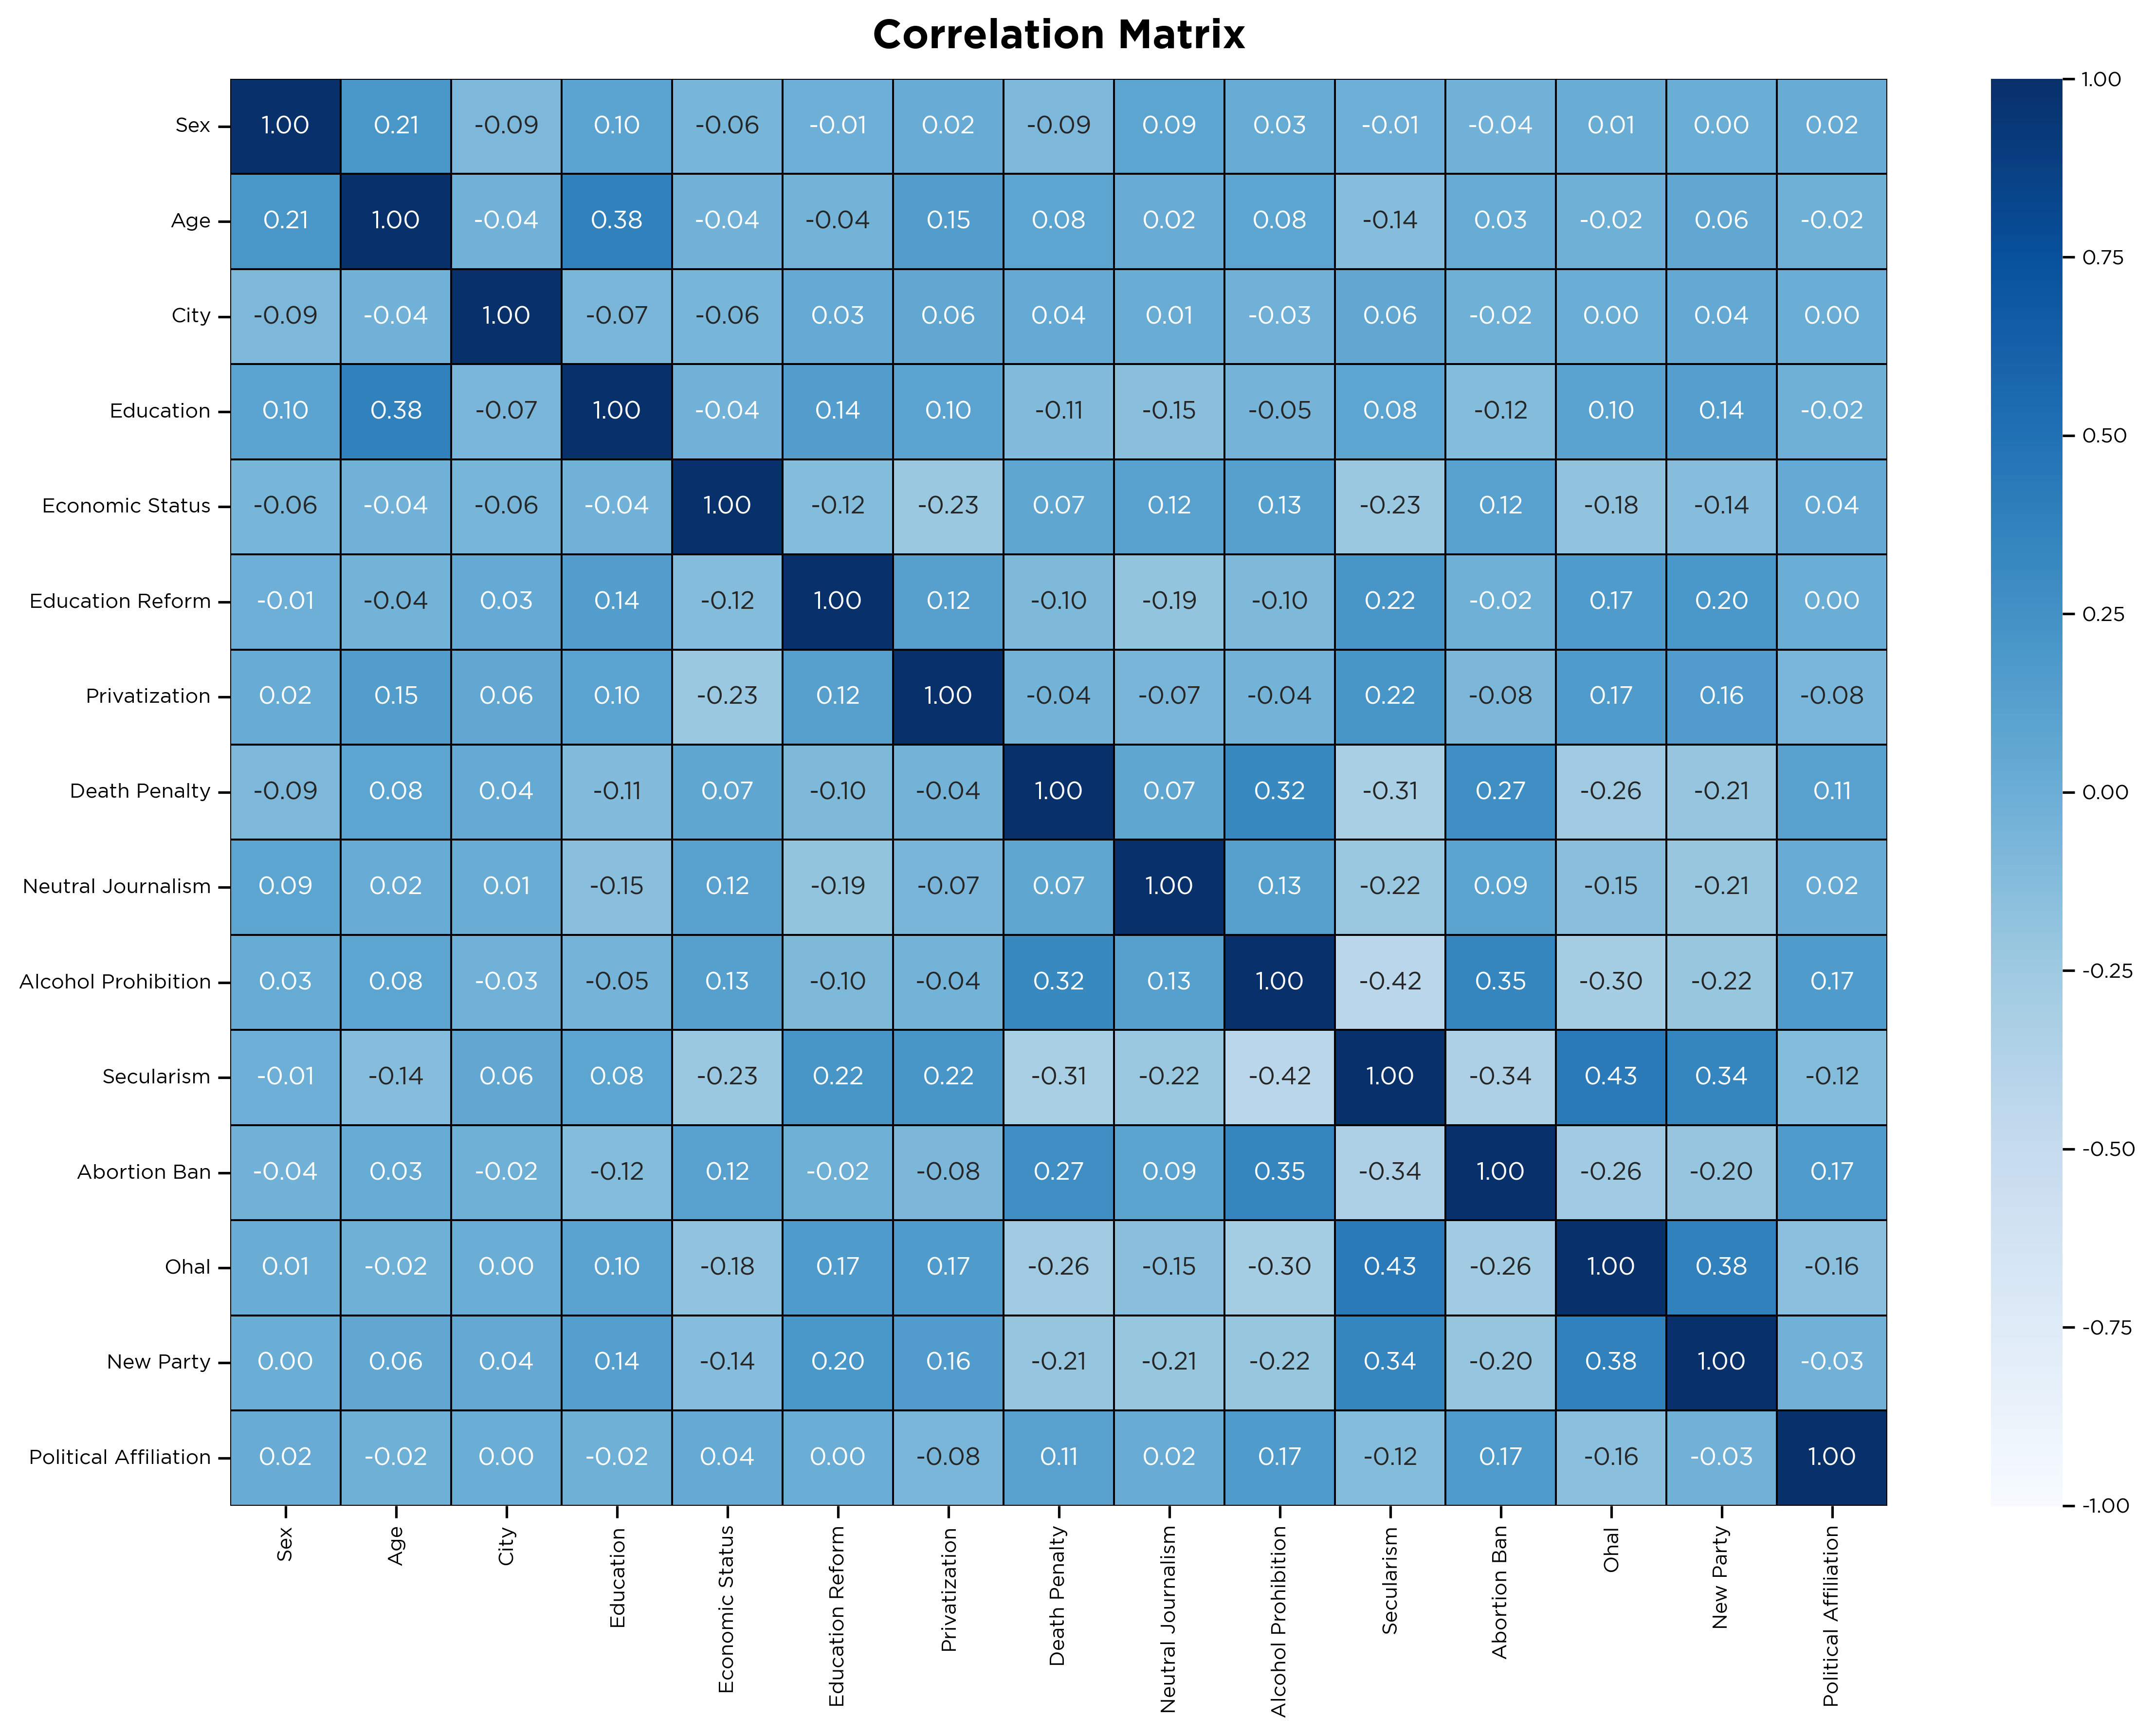

In [10]:
# Do correlation analysis
correlation_matrix = df_both.corr(method='spearman')

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix', fontweight='bold', fontsize=20, pad=15)

plt.tight_layout()
plt.savefig(os.path.join(save_path, '04-Correlation_Matrix.png'))
plt.show()